1. Для загрузки датасета подключаем доступ к google drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


2. Загружаем данные из файлов X_bp и X_nup

In [7]:
import pandas as pd

# Датасет лежит на облаке, указываем путь
X_bp = pd.read_excel('/content/drive/MyDrive/VKR/X_bp.xlsx') 
X_nup = pd.read_excel('/content/drive/MyDrive/VKR/X_nup.xlsx')

# Выведем размерности датасетов
X_bp.shape, X_nup.shape 


((1023, 11), (1040, 4))

3. Объединим набор данных X_bp и X_nup

In [8]:
data_set = pd.merge(X_bp, X_nup)

# X_bp < X_nup, потому устаняем строки без индекса
data_set.dropna(inplace = True)
# отобразим первые строки датасета
data_set.head() 

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [9]:
# появилось колонка Unnamed 0, удалим её
data_set.drop('Unnamed: 0', axis = 1, inplace = True)
# убедимся, что удален нужный столбец
data_set.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [10]:
# выведем размерность датасета после объединения
data_set.shape

(1023, 13)

In [11]:
# отобразим типы данных полученного датасета
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

Видим, что только **Угол нашивки** имеет int64, остальные float64

4. Описательная статистика

In [12]:
# выводим описательную статистику, транспонируем
data_set.describe().T 


,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


In [13]:
# проверим наличие в датасете пропущенных значений
data_set.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

В полученном датасете пропуски отсутствуют

In [14]:
# проверим колличество уникальных значений в датасете
data_set.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

В полученном датасете у **Угла нашивки** есть 2 значения: 0 или 90



Визуализация распределения значения признаков

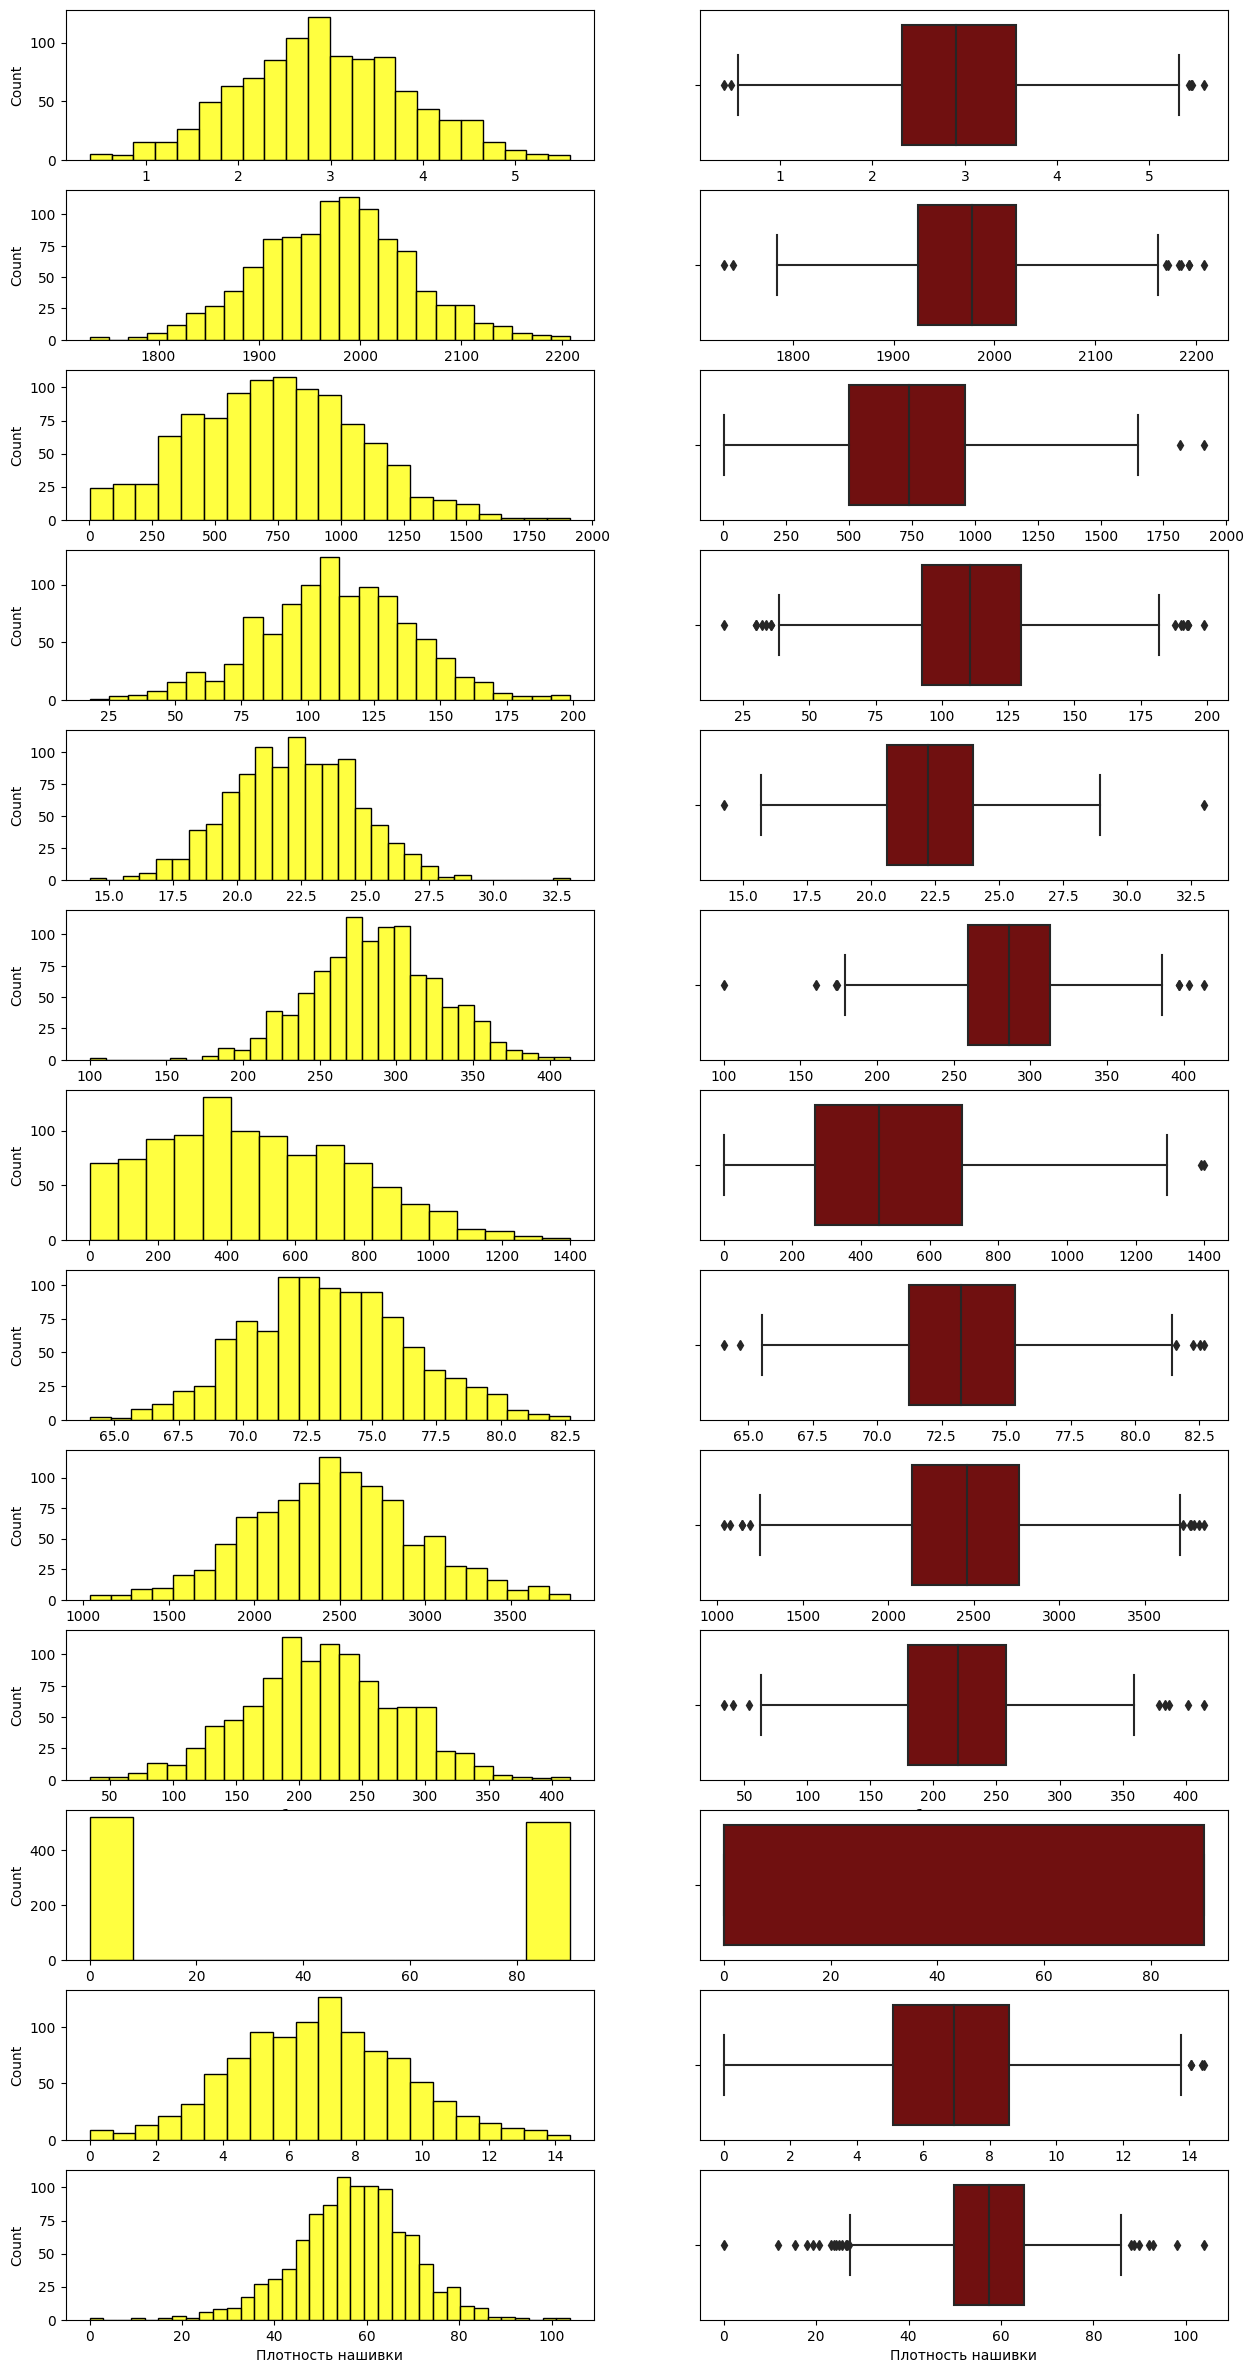

In [15]:
import matplotlib.pyplot as plt # библиотека визуализации данных
import seaborn as sns # библиотека визуализации данных
fig, axes = plt.subplots(13, 2, figsize = (15,30)) # создадим области, оси и зададим их размер

for i, column in enumerate(data_set.columns): 
    sns.histplot(data = data_set, x = column, ax = axes[i, 0], color = '#ffff00')
    sns.boxplot(data = data_set, x = column, ax = axes[i, 1], color = '#800000')
plt.show()

Распределение **Угола нашивки** отличается от остальных, признак имеет только 2 значения.

Что касается остальных признаков: данные имеют вид близкий к нормальному.

По данным видно, что имеются выбросы.

In [16]:
# построим диаграммы рассеяния
sns.pairplot(data_set, height = 3)

Output hidden; open in https://colab.research.google.com to view.

По диаграмме рассеяния видим насколько данные рассеянны. Можно предположить, что корреляция будет довольно низкая

Поиск и удаление выбросов, воспользуемся методом межквартильных расстояний

In [17]:
import numpy as np

# переберем значения в датасете
for i in data_set.columns:
    qant_75, qant_25 = np.percentile(data_set.loc[:, i], [75,25])
    intr_qr = qant_75 - qant_25
    max = qant_75 + (1.5 * intr_qr)
    min = qant_25 - (1.5 * intr_qr) 
    data_set.loc[data_set[i] < min, i] = np.nan # уберем значения меньше минимального
    data_set.loc[data_set[i] > max, i] = np.nan # уберем значения больше максимального

data_set.dropna(inplace = True)

In [18]:
# выведем размерности датасета после удаления признаков
data_set.shape

(936, 13)

Датасет уменьшился на 87 значений

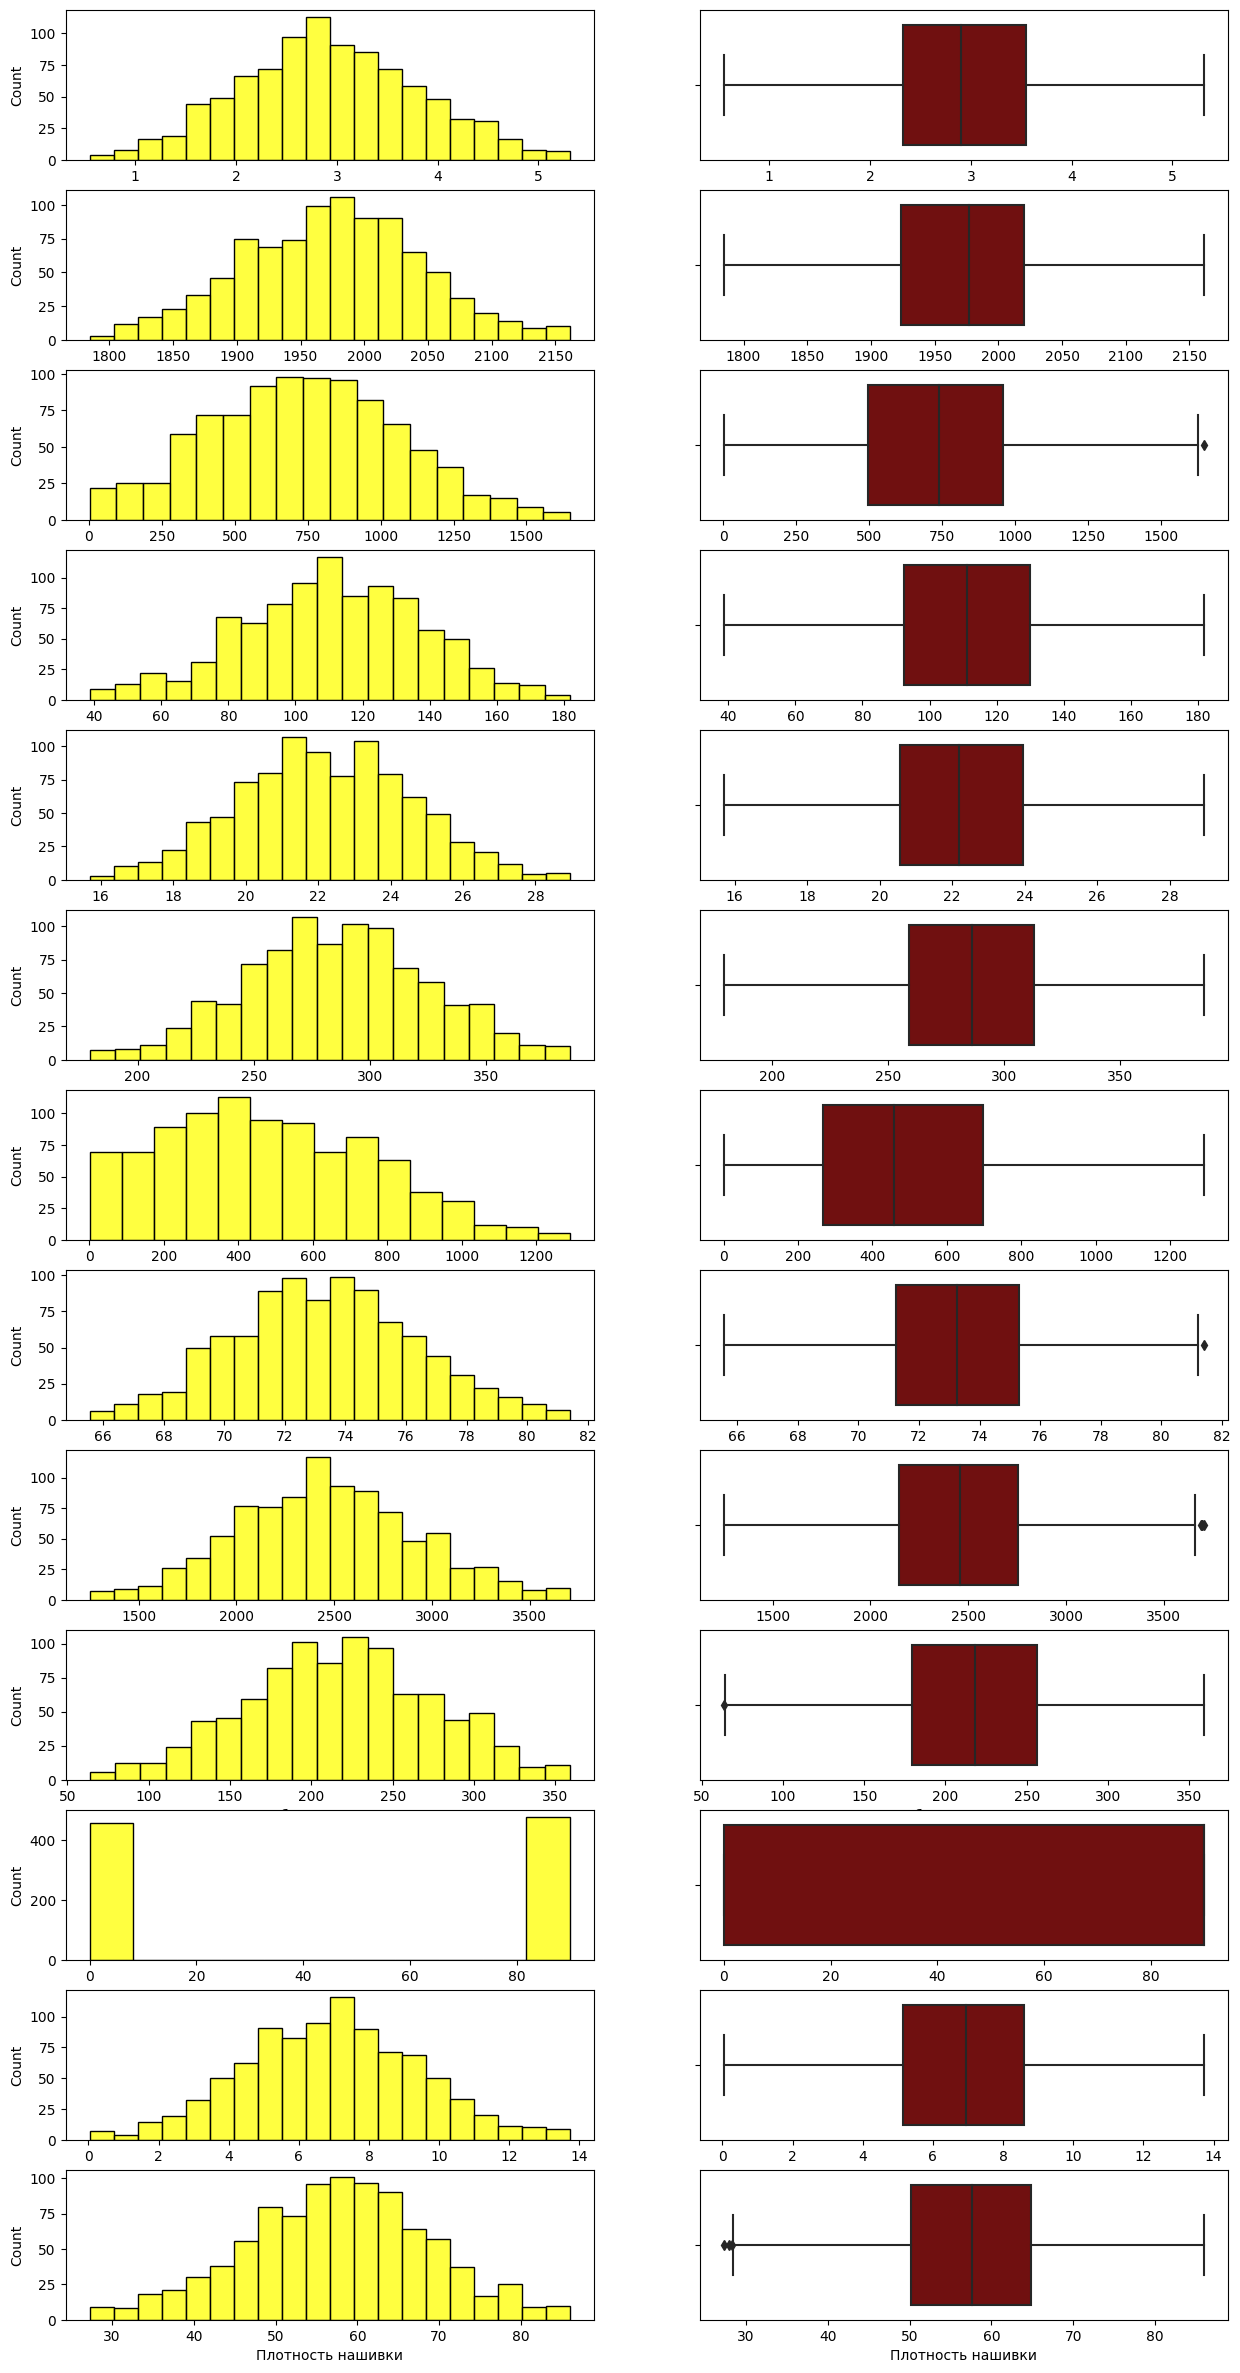

In [19]:
# вернемся к box plot и гистограммам после удаления выбросов

fig, axes = plt.subplots(13, 2, figsize = (15,30)) # создадим области, оси и зададим их размер

for i, column in enumerate(data_set.columns): 
    sns.histplot(data = data_set, x = column, ax = axes[i, 0], color = '#ffff00')
    sns.boxplot(data = data_set, x = column, ax = axes[i, 1], color = '#800000')
plt.show()

Построим матрицу корреляции

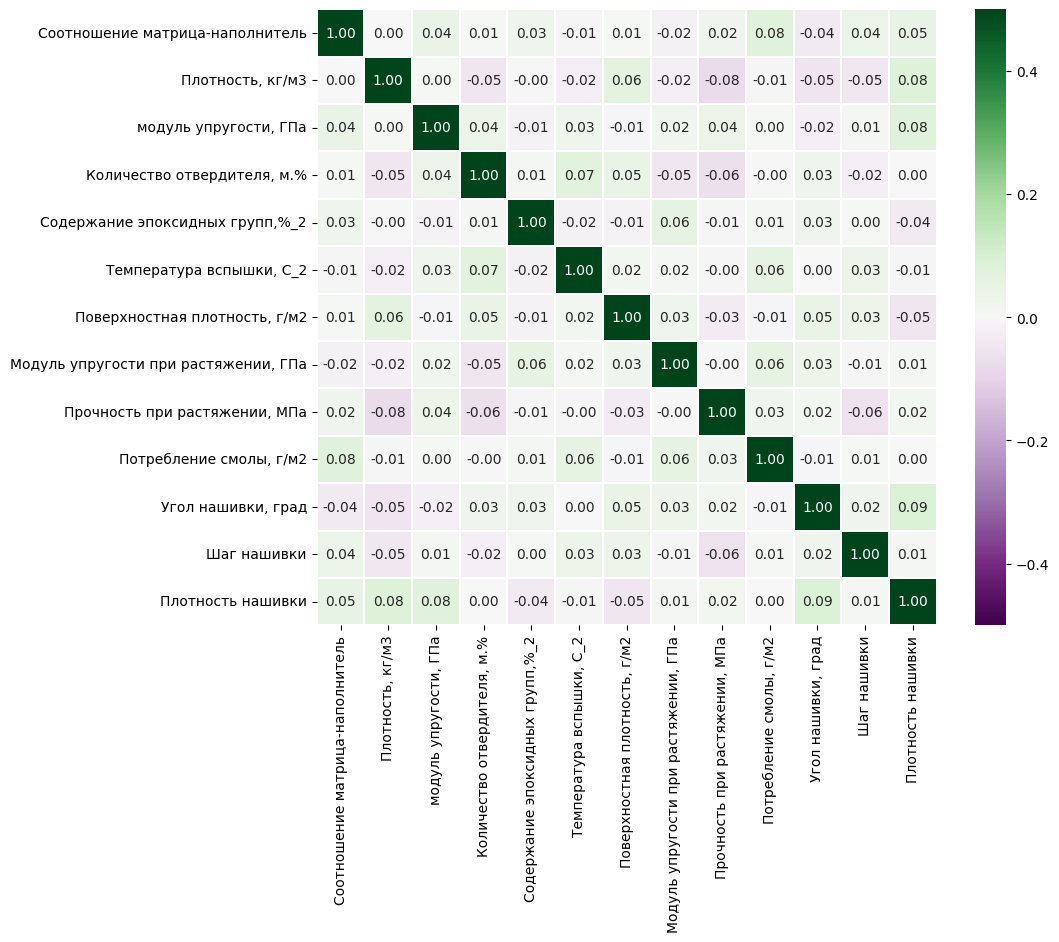

In [20]:
correlation = data_set.corr()
fig, axes = plt.subplots(figsize = (10, 8))
sns.heatmap(correlation, vmin=-0.5, vmax=0.5, annot=True, fmt='.2f',cmap='PRGn', ax = axes, linewidths = 0.1)
plt.show()


По матрице видно, что коэффициенты корреляции близки к нулю. Это показывает невыраженность или отсутствие линейной зависимости между признаками.

Максимальная корреляция наблюдается между **Плотностью нашивки** и **Углом нашивки**, составляет 0.09

Попробуем найти возможные связи между признаками.

Выполним нормализацию входных данных. Обратив внимание, что признак Угол нашивки имеет только 2 значения. Потому будем рассматривать его как категориальный

Нормализуем полученный датасет

In [21]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
columns = data_set.columns
data_set_n = scaler.fit_transform(np.array(data_set)) 
data_set_n = pd.DataFrame(data_set_n, columns=columns)
# нормализованный датасет 
data_set_n.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.274768,0.651097,0.447061,0.079153,0.607435,0.509164,0.16223,0.280303,0.71259,0.529221,0.0,0.289334,0.557156
1,0.274768,0.651097,0.447061,0.630983,0.418887,0.583596,0.16223,0.280303,0.71259,0.529221,0.0,0.362355,0.335840
2,0.466552,0.651097,0.455721,0.511257,0.495653,0.509164,0.16223,0.280303,0.71259,0.529221,0.0,0.362355,0.506083
3,0.465836,0.571539,0.452685,0.511257,0.495653,0.509164,0.16223,0.280303,0.71259,0.529221,0.0,0.362355,0.557156
4,0.424236,0.332865,0.488508,0.511257,0.495653,0.509164,0.16223,0.280303,0.71259,0.529221,0.0,0.362355,0.727399


Описательная статистика нормализованного датасета

In [23]:
# выводим описательную статистику, транспонируем
data_set_n.describe().T 

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,936.0,0.498933,0.187489,0.0,0.372274,0.494538,0.629204,1.0
"Плотность, кг/м3",936.0,0.502695,0.187779,0.0,0.368517,0.511229,0.624999,1.0
"модуль упругости, ГПа",936.0,0.446764,0.199583,0.0,0.301243,0.447061,0.580446,1.0
"Количество отвердителя, м.%",936.0,0.504664,0.188865,0.0,0.376190,0.506040,0.637978,1.0
"Содержание эпоксидных групп,%_2",936.0,0.491216,0.180620,0.0,0.367716,0.489382,0.623410,1.0
"Температура вспышки, С_2",936.0,0.516059,0.190624,0.0,0.386128,0.515980,0.646450,1.0
"Поверхностная плотность, г/м2",936.0,0.373733,0.217078,0.0,0.205619,0.354161,0.538683,1.0
"Модуль упругости при растяжении, ГПа",936.0,0.488647,0.191466,0.0,0.359024,0.485754,0.615077,1.0
"Прочность при растяжении, МПа",936.0,0.495706,0.188915,0.0,0.365149,0.491825,0.612874,1.0
"Потребление смолы, г/м2",936.0,0.521141,0.195781,0.0,0.392067,0.523766,0.652447,1.0


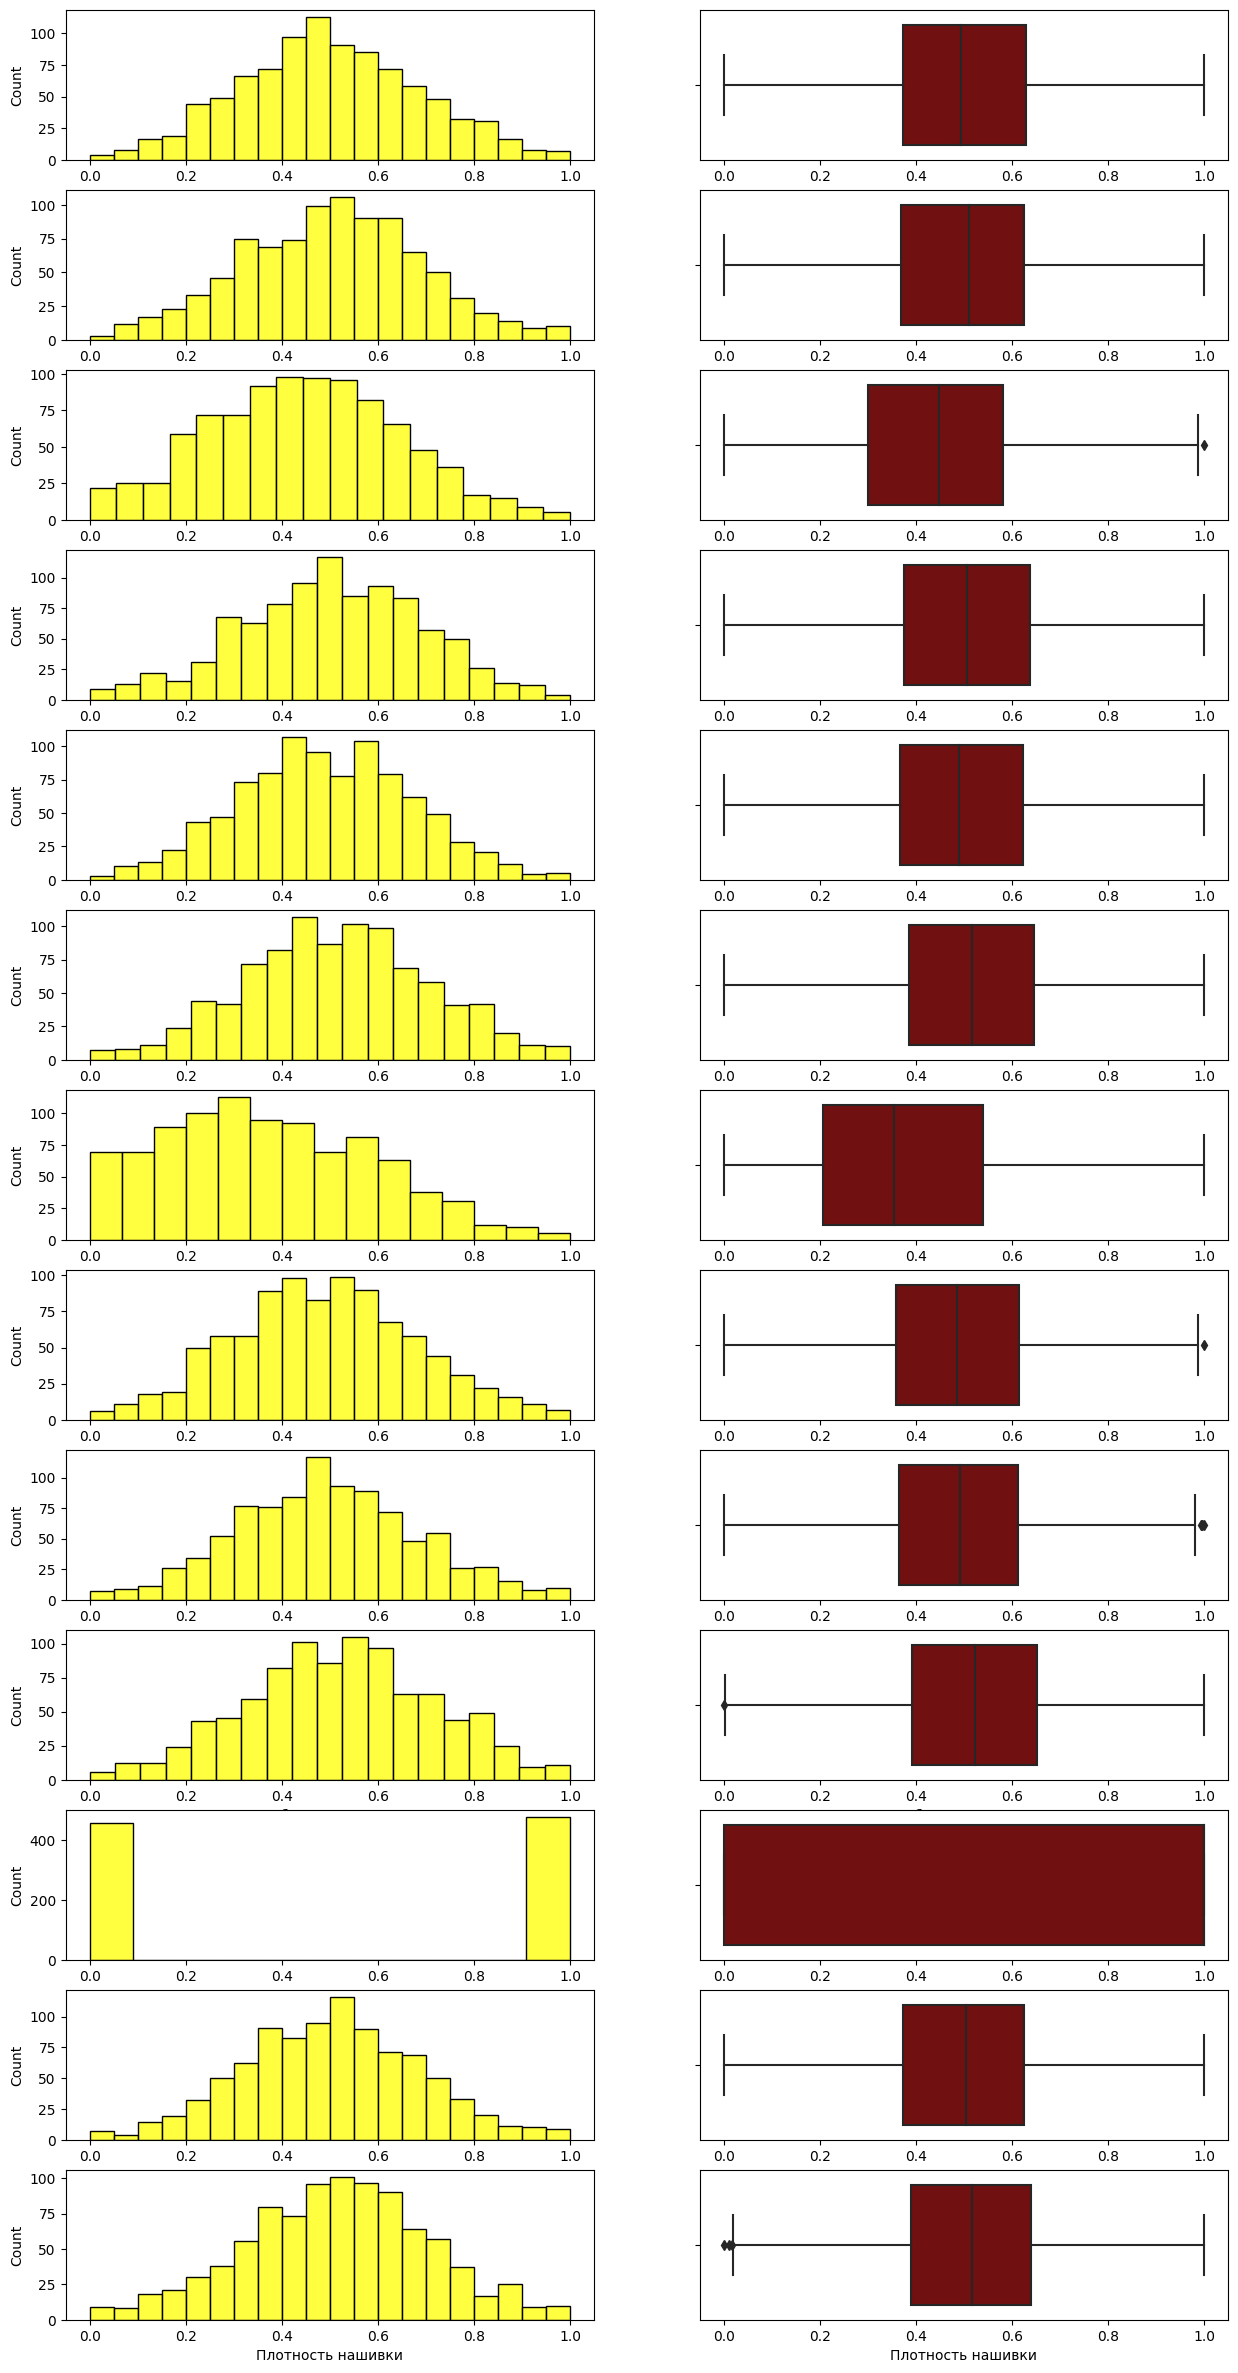

In [25]:
# вернемся к box plot и гистограммам после нормализации

fig, axes = plt.subplots(13, 2, figsize = (15,30)) # создадим области, оси и зададим их размер

for i, column in enumerate(data_set.columns): 
    sns.histplot(data = data_set_n, x = column, ax = axes[i, 0], color = '#ffff00')
    sns.boxplot(data = data_set_n, x = column, ax = axes[i, 1], color = '#800000')
plt.show()

После нормализации значения признаков близки друг к другу и модели будет проще с ними работать

Модели:
1. Прогноза модуля упругости при растяжении
2. Прогноза прочности при растяжении

Входы и выходы моделей. Разбиваем нашу выборку на x и y

In [29]:
# помещаем целевые переменные
y_label = ['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']
# выбираем целевые переменные из нормализованного датасета, помещаем в Y
y = data_set_n[y_label] 
# удаляем целевые переменные из X
x = data_set_n.drop(y_label, axis = 1)


In [30]:
# выведем размерности датасета
y.shape, x.shape

((936, 2), (936, 11))

Разделяем датасет на обучающую и тестовую выборки

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42) 

Создадимм список, в котором будем хранить модели

In [41]:
model_list = []

Линейная регрессия

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

loss_data_set = pd.DataFrame([])
# определяем модель
model = LinearRegression() 
# обучаем модель
model.fit(x_train,  y_train)
y_pred = model.predict(x_test)

model_name = 'Linear Regression'
def add_loss(loss_data_set, model_name):
    MSE = mean_squared_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    data_set = pd.DataFrame({'model':model_name,\
                             'tagret': ['Модуль упругости и Прочность'],\
                             'MSE':MSE,\
                             'R2':R2})
    loss_data_set = pd.concat([loss_data_set, data_set], ignore_index = True)
    return loss_data_set

loss_data_set = add_loss(loss_data_set, model_name)
    

In [ ]:
# отобарзим показатели эффективности

In [43]:
loss_data_set.head()

,model,tagret,MSE,R2
0,Linear Regression,Модуль упругости и Прочность,0.035074,-0.024522


R2 score получился хуже среднего по выборке

Регрессия k-ближайших соседей

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

model = KNeighborsRegressor()
#создадим набор параметров
grid = {'n_neighbors': range(1, 101, 1),
        'weights' : ['uniform', 'distance'],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

#переберем параметры при помощи GridSearch
grid_search = GridSearchCV(model, grid, n_jobs=-1, cv = 10, verbose = 1)
grid_search.fit(x_train,  y_train)
model = grid_search.best_estimator_
model.fit(x_train,  y_train)
y_pred = model.predict(x_test)
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
model_name = 'KNeighborsRegressor'
model_list.append(model)
loss_data_set = add_loss(loss_data_set,model_name)
model

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


KNeighborsRegressor(n_neighbors=100)

Для наглядности визуализируем предсказанные значения целевых переменных, напишем функции

In [47]:
# Визуализация предсказанных значений целевых переменных
def predicted_plot(y_test, y_pred, model_name):
  plt.figure(figsize=(15,9))
  plt.title(f'Тестовые и прогнозные значения, Модуль 1: {model_name}')
  plt.plot(y_test.to_numpy()[:,0], label='Тест')
  plt.plot(y_pred[:,0], label='Прогноз')
  plt.legend(loc='best')
  plt.ylabel('н')
  plt.xlabel('Порядок')

  plt.figure(figsize=(15,9))
  plt.title(f'Тестовые и прогнозные значения, Модуль 1: {model_name}')
  plt.plot(y_test.to_numpy()[:,1], label='Тест')
  plt.plot(y_pred[:,1], label='Прогноз')
  plt.legend(loc='best')
  plt.ylabel('н')
  plt.xlabel('Порядок')
# Для одной целевой переменной
def predicted_ns(y_test, y_pred):
  plt.figure(figsize=(15,9))
  plt.title(f'Тест и прогноз, Соотношение М-Н: ')
  plt.plot(y_test.to_numpy(), label='Тест')
  plt.plot(y_pred, label='Прогноз')
  plt.legend(loc='best')
  plt.ylabel('н')
  plt.xlabel('Порядок')

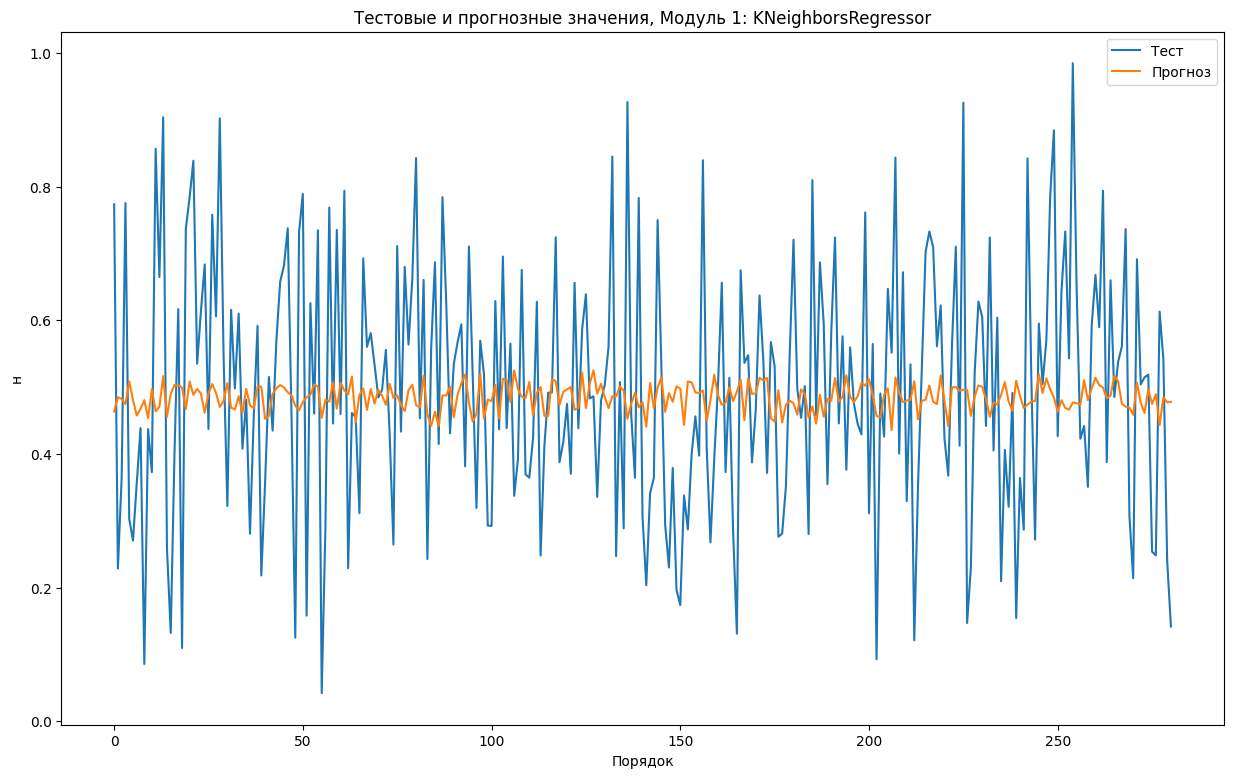

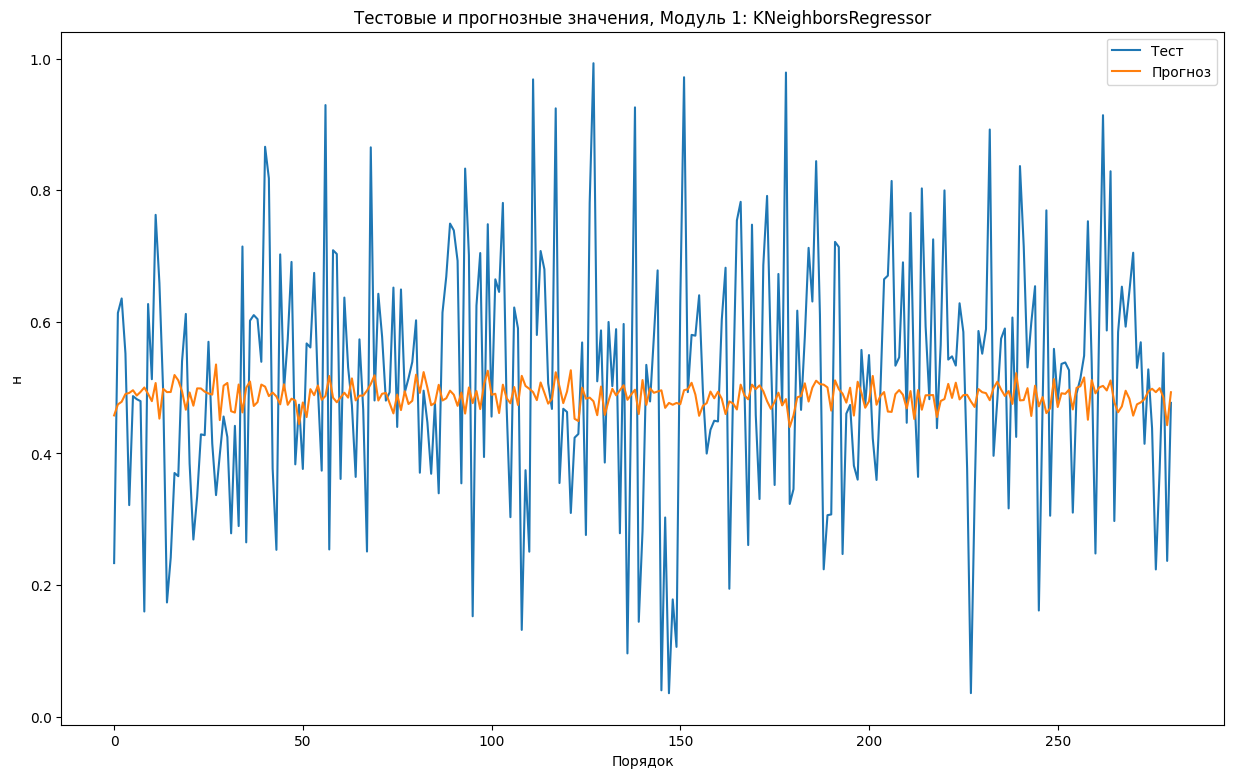

In [48]:
# визуализируем данные

predicted_plot(y_test, y_pred, model_name)

In [49]:
loss_data_set.head()

,model,tagret,MSE,R2
0,Linear Regression,Модуль упругости и Прочность,0.035074,-0.024522
1,KNeighborsRegressor,Модуль упругости и Прочность,0.034788,-0.016102


R2 score получился хуже среднего по выборке.

Чтобы получить положительный результат, нужны преобразования над исходным датасетом

In [61]:
from joblib import dump

dump(model, 'KNeighborsRegressor.joblib')

['KNeighborsRegressor.joblib']

Нейронная сеть для рекомендации соотношения матрица - наполнитель. Сведем рекомендательную систему к регрессору

In [50]:
y = data_set_n['Соотношение матрица-наполнитель']
x = data_set_n.drop(['Соотношение матрица-наполнитель'], axis = 1)

x_train, x_test, y_train,y_test = train_test_split(x, y , test_size=0.3, random_state=42)
y.shape, x.shape

((936,), (936, 12))

In [51]:
from keras.engine.sequential import Sequential
from keras import layers
from keras import models
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 1])
    plt.xlabel('Эпоха')

    plt.ylabel('MAE [MPG]')
    plt.legend()
    plt.grid(True)
model = Sequential()
model.add(layers.Dense(50, input_dim = x.shape[1], activation = 'relu'))
model.add(layers.Dropout(0.12))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.12))
model.add(layers.Dense(19, activation = 'relu'))
model.add(layers.Dropout(0.12))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.12))
model.add(layers.Dense(32, activation = 'softmax'))
model.add(layers.Dense(1))


In [55]:
# выведем полученную структуру
model.summary()
# вызовем компиляцию модели
dfmodel = model.compile(optimizer = 'adam', loss= 'mae', metrics= ['mae'])
# запускаем обучение модели
history = model.fit(
    x_train,
    y_train,
    validation_split = 0.2,
    verbose=1, epochs = 15)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                650       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               6528      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 19)                2451      
                                                                 
 dropout_2 (Dropout)         (None, 19)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                1

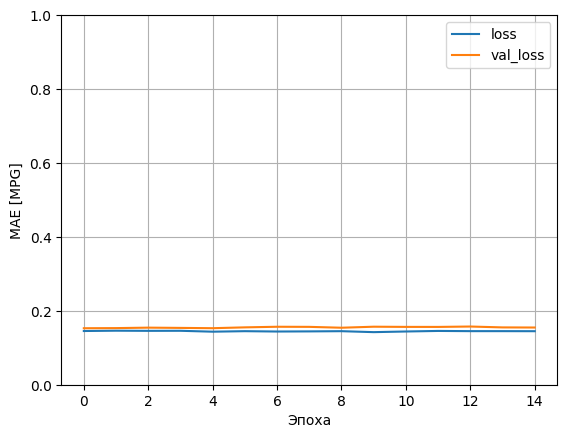

In [56]:
plot_loss(history)

9/9 [==============================] - 0s 4ms/step


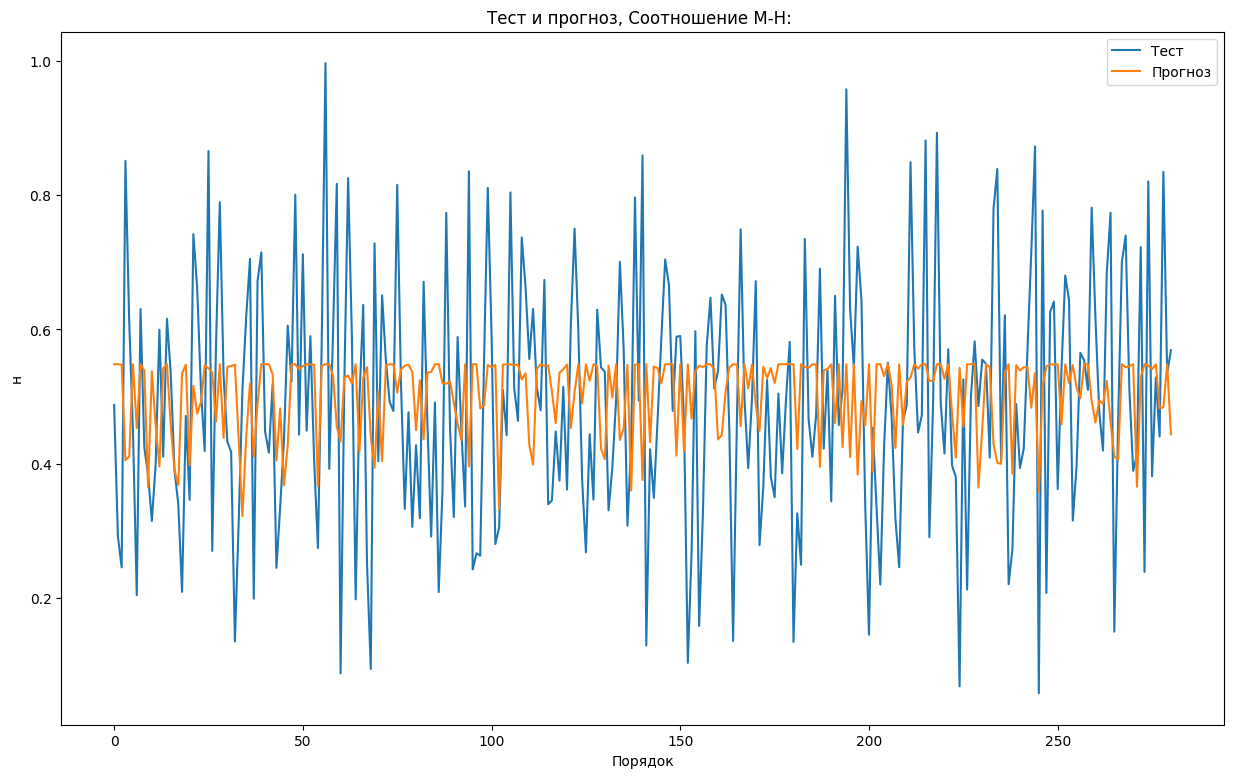

In [57]:
predicted_ns(y_test, model.predict(x_test))

In [58]:
# оценка MSE
model.evaluate(x_test, y_test, verbose = 1)

9/9 [==============================] - 0s 12ms/step - loss: 0.1563 - mae: 0.1563


[0.15628713369369507, 0.15628713369369507]

In [67]:
MSE = mean_squared_error(y_test, model.predict(x_test.values))
R2 = r2_score(y_test, model.predict(x_test.values))
last_result = pd.DataFrame
print(f'MSE = {MSE}')
print(f'R2_score = {R2}')

9/9 [==============================] - 0s 3ms/step
MSE = 0.03745865774514111
R2_score = -0.11742738667710118


В случае с рекомендательной нейронной сетью R2 выглядит хуже среднего по выборке

In [69]:
type(loss_data_set)

pandas.core.frame.DataFrame